# Udacity - Machine Learning Engineer Nanodegree



## Capstone Project: Determine the price of used cars

***
                    
                              
                                      
## Part 0: Prerequisites

Import the needed libraries:

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

import seaborn as sns
sns.set_style("whitegrid")

## Part I: Data Import

In the first step of the analysis I'm going to import the data. 

The dataset is called **Used cars database** and was taken from kaggle, you can find it [here](https://www.kaggle.com/orgesleka/used-cars-database).

In [2]:
df = pd.read_csv('autos.csv', encoding = 'cp1252')

print('The dataframe consists of', df.shape[0], 'observations and', df.shape[1], 'features.')
df.head()

The dataframe consists of 371528 observations and 20 features.


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


## Part II: Data Wrangling

The aim of Part II is to get all the needed data in a great quality and structure. Therefore I'm going to have a look at every feature to asses, if it's needed to be modified, replaced or removed from the dataset. 

There are some unnecessary columns in the dataset and I will remove them first:

In [3]:
df = df.drop(['dateCrawled', 'dateCreated', 'lastSeen', 'monthOfRegistration', 'name'], axis = 1)

### seller

In [4]:
df.groupby('seller')['seller'].count()

seller
gewerblich         3
privat        371525
Name: seller, dtype: int64

The seller-feature has 3 commercial (gewerblich) and 371525 private (privat) entries. So I will drop the columns, it does not provide needful information.

### offerType

In [5]:
df.groupby('offerType')['offerType'].count()

offerType
Angebot    371516
Gesuch         12
Name: offerType, dtype: int64

Most of the entries are offers (Angebot) and some are requests (Gesuch). So I will drop that column, too.

### abtest

In [6]:
df.groupby('abtest')['abtest'].count()

abtest
control    178943
test       192585
Name: abtest, dtype: int64

This columns seems to be for A-/B-testing. We will not use that.

In [7]:
# remove all columns

df = df.drop(['seller', 'offerType', 'abtest'], axis = 1)

### vehicleType

In [8]:
df.groupby('vehicleType')['vehicleType'].count()

vehicleType
andere         3357
bus           30201
cabrio        22898
coupe         19015
kleinwagen    80023
kombi         67564
limousine     95894
suv           14707
Name: vehicleType, dtype: int64

Seems to be ok for me.

### yearOfRegistration

The year of registration is the year at which the car was first registered.

In [9]:
df['yearOfRegistration'].describe()

count    371528.000000
mean       2004.577997
std          92.866598
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        9999.000000
Name: yearOfRegistration, dtype: float64

In [10]:
df[df['yearOfRegistration'] < 1970] 

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,nrOfPictures,postalCode
15,450,kleinwagen,1910,NaN,0,ka,5000,benzin,ford,NaN,0,24148
192,25000,coupe,1968,automatik,305,mustang,90000,benzin,ford,nein,0,74547
426,90500,cabrio,1959,automatik,295,andere,90000,benzin,chevrolet,nein,0,94032
649,0,NaN,1111,NaN,0,NaN,5000,NaN,opel,NaN,0,44628
657,12000,limousine,1969,manuell,140,s_klasse,80000,benzin,mercedes_benz,nein,0,46286
...,...,...,...,...,...,...,...,...,...,...,...,...
370654,6000,limousine,1937,manuell,38,andere,5000,benzin,mercedes_benz,NaN,0,23936
371099,200,NaN,1910,NaN,0,NaN,5000,benzin,sonstige_autos,NaN,0,42289
371177,10500,cabrio,1968,manuell,54,andere,20000,NaN,renault,nein,0,63755
371214,30900,cabrio,1960,automatik,250,NaN,100000,benzin,sonstige_autos,nein,0,95444


In [11]:
# the dataset contains data from 2016, so the cars can not be older

df[df['yearOfRegistration'] > 2016] 

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,nrOfPictures,postalCode
22,2900,NaN,2018,manuell,90,meriva,150000,benzin,opel,nein,0,49716
26,5555,NaN,2017,manuell,125,c4,125000,NaN,citroen,nein,0,31139
48,7750,NaN,2017,manuell,80,golf,100000,benzin,volkswagen,NaN,0,48499
51,2000,NaN,2017,manuell,90,punto,150000,diesel,fiat,ja,0,66115
58,2399,NaN,2018,manuell,64,andere,125000,NaN,seat,nein,0,33397
...,...,...,...,...,...,...,...,...,...,...,...,...
371258,3600,NaN,2017,manuell,86,transit,150000,diesel,ford,NaN,0,32339
371286,1000,NaN,2017,manuell,101,a4,150000,NaN,audi,NaN,0,38315
371354,2140,NaN,2018,manuell,80,fiesta,150000,NaN,ford,nein,0,44866
371407,1250,NaN,2018,NaN,0,corsa,150000,benzin,opel,NaN,0,45527


The column *yearOfRegistration* obviously needs to be cleaned. The ads where published in 2016 so 2016 is the maximum value for me. The minimum year is a little bit tricky. There are some oldtimers in the dataset but there is also missy data. After a few tries, I set the lower limit to 1970.

In [12]:
df = df[(df['yearOfRegistration'] >= 1970) & (df['yearOfRegistration'] <= 2016)]

### gearbox

In [13]:
df.groupby('gearbox')['gearbox'].count()

gearbox
automatik     74752
manuell      262497
Name: gearbox, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355109 entries, 0 to 371527
Data columns (total 12 columns):
price                 355109 non-null int64
vehicleType           332178 non-null object
yearOfRegistration    355109 non-null int64
gearbox               337249 non-null object
powerPS               355109 non-null int64
model                 337296 non-null object
kilometer             355109 non-null int64
fuelType              327820 non-null object
brand                 355109 non-null object
notRepairedDamage     289989 non-null object
nrOfPictures          355109 non-null int64
postalCode            355109 non-null int64
dtypes: int64(6), object(6)
memory usage: 35.2+ MB


gearbox can be manual or automatic. But there are also missing values and I'm going to remove them later.

### powerPS

The power of a car measured in PS has a high impact of it's price.

In [15]:
df['powerPS'].describe()

count    355109.000000
mean        116.721463
std         187.013374
min           0.000000
25%          73.000000
50%         107.000000
75%         150.000000
max       20000.000000
Name: powerPS, dtype: float64

In [16]:
# let's have a look at the minimum
df[df['powerPS'] <= 30]

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,nrOfPictures,postalCode
0,480,NaN,1993,manuell,0,golf,150000,benzin,volkswagen,NaN,0,70435
32,245,limousine,1994,NaN,0,golf,150000,benzin,volkswagen,nein,0,44145
37,1500,NaN,2016,NaN,0,kangoo,150000,diesel,renault,nein,0,46483
40,0,NaN,1990,NaN,0,corsa,150000,benzin,opel,NaN,0,56412
54,4700,kombi,2005,manuell,0,signum,150000,NaN,opel,nein,0,88433
...,...,...,...,...,...,...,...,...,...,...,...,...
371504,2600,NaN,2005,automatik,0,c_klasse,150000,NaN,mercedes_benz,NaN,0,61169
371518,3999,kombi,2005,manuell,3,3er,150000,diesel,bmw,nein,0,81825
371521,1150,bus,2000,manuell,0,zafira,150000,benzin,opel,nein,0,26624
371522,0,NaN,2005,manuell,0,colt,150000,benzin,mitsubishi,ja,0,2694


In [17]:
# let's have a look at the maximum
df[df['powerPS'] > 600]

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,nrOfPictures,postalCode
1898,3200,kleinwagen,2004,manuell,1398,corolla,5000,benzin,toyota,nein,0,22043
2199,0,limousine,1999,NaN,1799,vectra,150000,benzin,opel,ja,0,1723
2735,120000,cabrio,2012,automatik,666,NaN,20000,benzin,sonstige_autos,nein,0,80331
4254,3100,limousine,2005,manuell,953,colt,150000,diesel,mitsubishi,nein,0,60326
5582,500,kombi,1999,manuell,1001,astra,150000,benzin,opel,NaN,0,33154
...,...,...,...,...,...,...,...,...,...,...,...,...
366861,3895000,coupe,2006,NaN,799,NaN,5000,benzin,sonstige_autos,nein,0,60323
367041,1600000,coupe,2005,NaN,625,NaN,10000,benzin,sonstige_autos,nein,0,70569
369007,1500,bus,2001,manuell,1001,zafira,5000,diesel,opel,nein,0,66117
370760,2400,limousine,2007,manuell,650,c2,150000,benzin,citroen,NaN,0,45277


After a few tries, I set the lower limit to 30 and the maximum limit to 600 ps.

In [18]:
df = df[(df['powerPS'] > 30) & (df['powerPS'] < 600)]

### model

In [19]:
df['model'].value_counts()

golf               26175
andere             22062
3er                18574
polo               10995
corsa              10338
                   ...  
samara                 5
rangerover             4
serie_2                4
serie_3                3
discovery_sport        1
Name: model, Length: 250, dtype: int64

This feature contains too many different entries that it will not help us and I'm going to drop that column.

In [20]:
df = df.drop('model', axis = 1)

### kilometer

In [21]:
df['kilometer'].describe()

count    317490.000000
mean     125767.693471
std       39133.937478
min        5000.000000
25%      100000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: kilometer, dtype: float64

Seems to be fine for me.

### fuelType

In [22]:
df['fuelType'].value_counts()

benzin     197393
diesel      97600
lpg          4863
cng           494
hybrid        245
andere         60
elektro        48
Name: fuelType, dtype: int64

Seems to be fine.

### brand

In [23]:
df['brand'].value_counts()

volkswagen        68113
bmw               36209
opel              33516
mercedes_benz     30737
audi              29569
ford              21361
renault           14248
peugeot            9575
fiat               7732
seat               6087
skoda              5125
mazda              4890
smart              4513
citroen            4280
nissan             4212
toyota             4126
hyundai            3196
mini               3165
volvo              2960
mitsubishi         2599
honda              2453
kia                2218
alfa_romeo         2037
suzuki             2000
porsche            1992
sonstige_autos     1964
chevrolet          1510
chrysler           1204
dacia               805
jeep                691
land_rover          682
subaru              681
daihatsu            637
jaguar              530
saab                486
daewoo              414
lancia              401
rover               387
lada                161
trabant              24
Name: brand, dtype: int64

Seems to be fine.

### notRepairedDamage

In [24]:
df['notRepairedDamage'].value_counts()

nein    241495
ja       30423
Name: notRepairedDamage, dtype: int64

In [25]:
df.shape

(317490, 11)

The notRepairedDamage-column consists of yes and no, but there are also 45572 columns with missing values. On the one hand it would be interesting to see how damages influence the price but on the other hand I don't want to remove all the missing values. But this has to be decided, so I will remove the missing values (later at the end of this part).

### nrOfPictures

In [26]:
df['nrOfPictures'].describe()

count    317490.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: nrOfPictures, dtype: float64

Ok, without any entries I will drop that column.

In [27]:
df = df.drop('nrOfPictures', axis = 1)

In [28]:
# drop all entries with missing values
df = df.dropna(axis = 0, how = 'any')

### postalCode

In [29]:
len(df['postalCode'].unique())

8080

Well, there are 8080 different postal codes in the dataset. And although they are wrote as figures this is categoraical data. It is possible to reduce the number of postal codes by assigning the postal code to a federal state. It is quite possible that the prices for used cars differ in different federal states.

Let's import the look-up-table:

In [30]:
# import the data
lup = pd.read_excel('Liste-der-PLZ-in-Excel-Karte-Deutschland-Postleitzahlen.xlsx')

# drop columns
lup = lup.drop(['Kreis', 'Typ'], axis = 1)

# rename column
lup = lup.rename(columns = {'Bundesland': 'federal_state',
                           'PLZ': 'postalCode'})

# show table
lup.head()

,postalCode,federal_state
0,1067,Sachsen
1,1069,Sachsen
2,1097,Sachsen
3,1099,Sachsen
4,1108,Sachsen


In [31]:
df = pd.merge(df, lup, how='inner', left_on=['postalCode'], right_on=['postalCode'])
df = df.drop('postalCode', axis = 1)

### price

In [32]:
df['price'].describe()

count    2.557210e+05
mean     8.346411e+03
std      3.467986e+05
min      0.000000e+00
25%      1.600000e+03
50%      3.949000e+03
75%      8.800000e+03
max      1.000000e+08
Name: price, dtype: float64

In [33]:
df[df['price'] > 100000]

,price,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,fuelType,brand,notRepairedDamage,federal_state
2069,107000,coupe,1996,manuell,286,150000,benzin,porsche,nein,Nordrhein-Westfalen
2811,198000,coupe,2015,automatik,500,5000,benzin,porsche,nein,Nordrhein-Westfalen
3397,130000,coupe,2015,automatik,231,5000,hybrid,bmw,nein,Niedersachsen
3970,205000,coupe,2011,automatik,571,50000,benzin,mercedes_benz,nein,Bayern
4761,105999,limousine,2015,automatik,333,5000,hybrid,porsche,nein,Bayern
...,...,...,...,...,...,...,...,...,...,...
250567,136000,coupe,2001,manuell,551,125000,benzin,porsche,nein,Bayern
251358,169000,coupe,2013,automatik,476,20000,benzin,porsche,nein,Bayern
253699,109000,coupe,2003,automatik,360,60000,benzin,bmw,nein,Bayern
253895,145000,kombi,2012,manuell,140,80000,diesel,skoda,nein,Niedersachsen


In [34]:
df[df['price'] == 100]

,price,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,fuelType,brand,notRepairedDamage,federal_state
733,100,kleinwagen,1997,manuell,55,150000,benzin,citroen,nein,Baden-Württemberg
891,100,kleinwagen,1998,manuell,54,150000,benzin,fiat,nein,Hessen
3792,100,kleinwagen,1999,manuell,55,90000,benzin,ford,nein,Bayern
3803,100,kleinwagen,1998,manuell,44,150000,benzin,peugeot,ja,Bayern
4053,100,kleinwagen,1993,manuell,60,150000,benzin,volkswagen,nein,Rheinland-Pfalz
...,...,...,...,...,...,...,...,...,...,...
254240,100,kleinwagen,1996,manuell,55,150000,benzin,ford,ja,Baden-Württemberg
254341,100,limousine,1999,automatik,155,150000,benzin,alfa_romeo,nein,Bayern
254505,100,kleinwagen,2000,manuell,75,150000,benzin,sonstige_autos,ja,Sachsen
255156,100,limousine,1998,manuell,88,150000,benzin,mazda,ja,Bayern


Since this is a used car market, the price ceiling is to be set at EUR 100000 and the price floor at 100 EUR.

In [35]:
df = df[(df['price'] > 100) & (df['price'] <= 100000)]

In [36]:
df.head()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,fuelType,brand,notRepairedDamage,federal_state
0,18300,coupe,2011,manuell,190,125000,diesel,audi,ja,Rheinland-Pfalz
1,3450,kleinwagen,2007,manuell,88,100000,benzin,ford,nein,Rheinland-Pfalz
2,950,bus,1998,manuell,114,150000,benzin,renault,nein,Rheinland-Pfalz
3,10300,kombi,2006,automatik,170,125000,diesel,volkswagen,nein,Rheinland-Pfalz
4,6500,bus,2005,manuell,193,100000,benzin,mercedes_benz,nein,Rheinland-Pfalz


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251555 entries, 0 to 255720
Data columns (total 10 columns):
price                 251555 non-null int64
vehicleType           251555 non-null object
yearOfRegistration    251555 non-null int64
gearbox               251555 non-null object
powerPS               251555 non-null int64
kilometer             251555 non-null int64
fuelType              251555 non-null object
brand                 251555 non-null object
notRepairedDamage     251555 non-null object
federal_state         251555 non-null object
dtypes: int64(4), object(6)
memory usage: 21.1+ MB


In [38]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer
count,251555.000000,251555.000000,251555.000000,251555.000000
mean,6782.782584,2003.547300,129.714333,123896.901274
std,8046.121542,6.137569,61.866259,39757.475292
min,101.000000,1970.000000,31.000000,5000.000000
25%,1690.000000,2000.000000,86.000000,100000.000000
50%,3999.000000,2004.000000,116.000000,150000.000000
75%,8900.000000,2008.000000,160.000000,150000.000000
max,100000.000000,2016.000000,589.000000,150000.000000


There was a lot of cleaning that needed to be done. The dataset after cleaning has 251,555 observations and 10 columns:

- price
- vehicleType
- yearOfRegistration
- gearbox
- powerPS
- kilometer
- fuelType
- brand
- notRepairedDamage
- federal_state

The price has a range between > 100 and <= 100,000 Euro, the yearOfRegistration goes back to 1970, the powerPS ranges between 31 and 589 and the kilometer between 5000 and 150000.

## Part III: EDA

In this part I'm going to explore the data to find patterns and to build on intuition on what I'm working on.

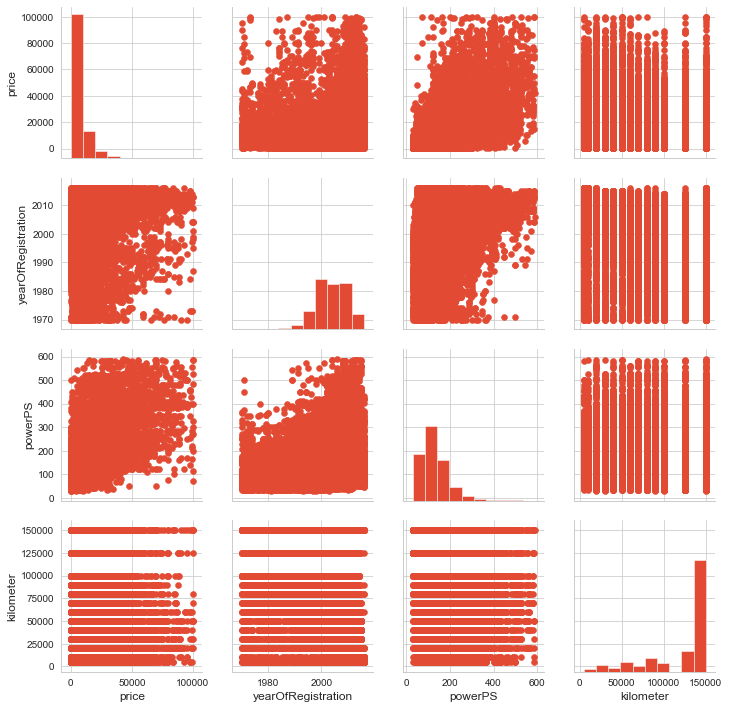

In [36]:
g = sns.PairGrid(data = df, palette = 'Set2'); 
g = g.map_offdiag(plt.scatter);
g.map_diag(plt.hist, edgecolor="w");

First of all let's have a look at the histograms:

- the price histogram is right skewed and has a long tail. Most of the prices are between 0 and 50000 EUR, so we can make the tail shorter
- the year of registration is in most cases between 1980 und 2016
- PS is in most cases smaller than 400 PS
- we have a large number of cars having around 150000 kilometers. Since this is a used car market this seems to be fine for me.

In [37]:
df = df[df['price'] <= 50000]
df = df[df['yearOfRegistration'] >= 1980]
df = df[df['powerPS'] <= 400]

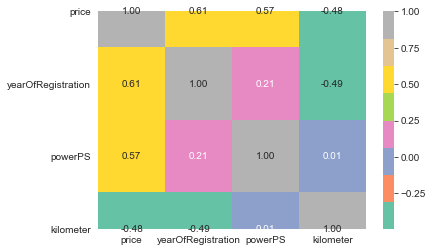

In [38]:
sns.heatmap(df.corr(), cmap = 'Set2', fmt='.2f', annot = True); #cmap = 'vlag_r'

In [39]:
df.corr()

,price,yearOfRegistration,powerPS,kilometer
price,1.000000,0.607277,0.572826,-0.484803
yearOfRegistration,0.607277,1.000000,0.212416,-0.493785
powerPS,0.572826,0.212416,1.000000,0.006572
kilometer,-0.484803,-0.493785,0.006572,1.000000


Although the edges are cut off (there seems to be a problem with the current version of matplotlib) we can see that price is influenced by the year of registration, PS of the car and finally by kilometer.

In general you can say **a car is more expensive when it is younger, has more horsepower and fewer kilometers.**

Later on in this EDA I would like to focus my attention on the scatterplots. I'm going to use samples of the dataframe, because I'm having too much observations in the dataframe.

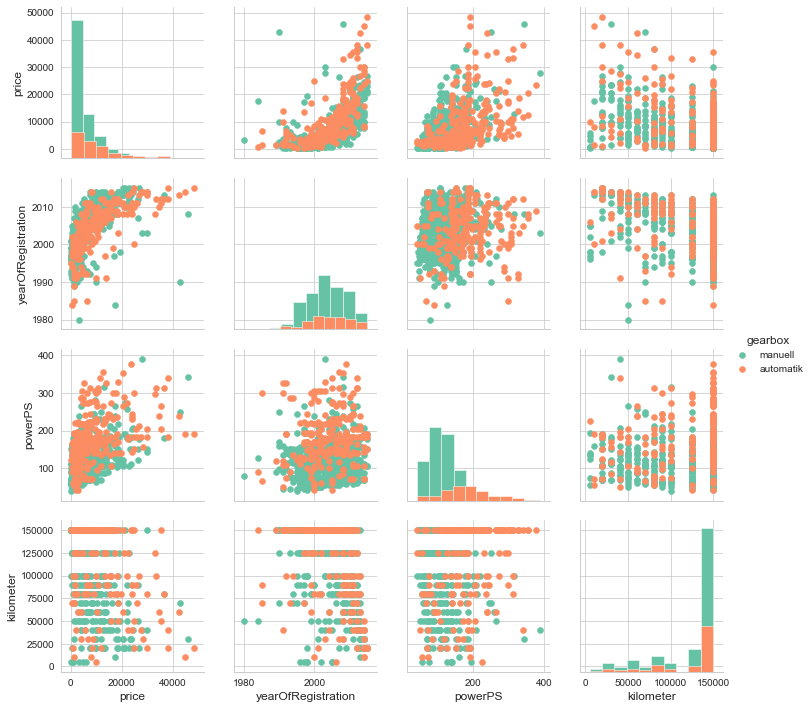

In [40]:
g = sns.PairGrid(data = df.sample(1000), hue = 'gearbox', palette = 'Set2');
g = g.map_offdiag(plt.scatter);
g.add_legend();
g.map_diag(plt.hist, edgecolor="w");

Cars with an automatic gearbox seem to be more expensive and have more PS than cars with a manual gearbox. So gearbox seems to be an important feature.

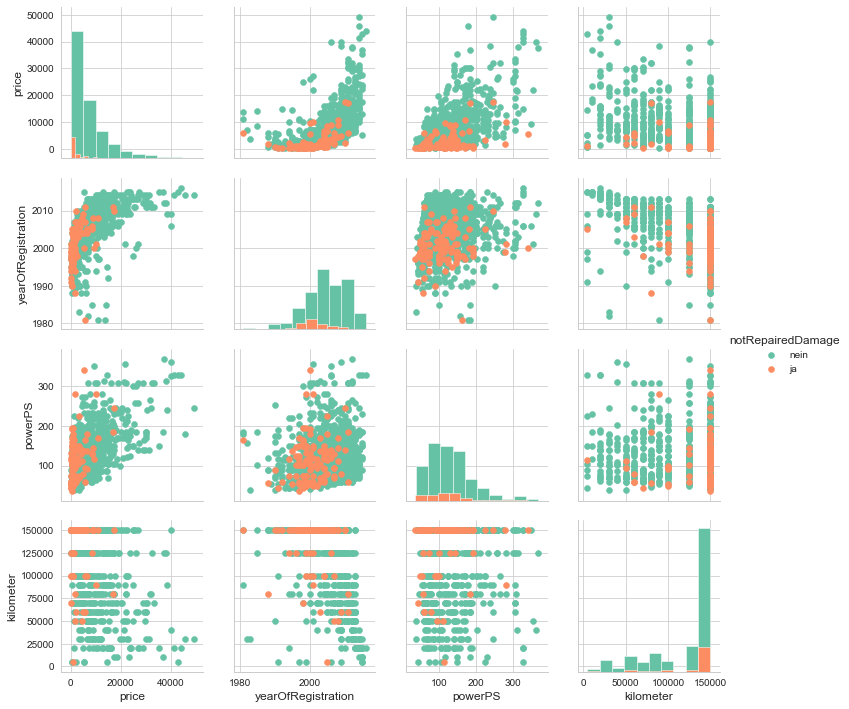

In [41]:
g = sns.PairGrid(data = df.sample(1000), hue = 'notRepairedDamage', palette = 'Set2');
g = g.map_offdiag(plt.scatter);
g.add_legend();
g.map_diag(plt.hist, edgecolor="w");

Cars having a not repaired damage are much cheaper than other ones and have on average more kilometers. It seems to be an important feature.

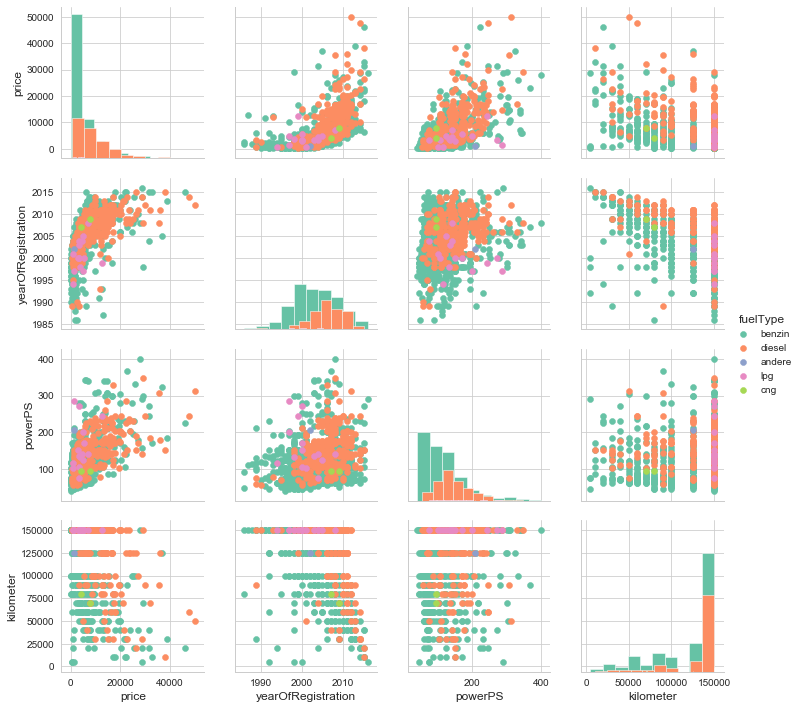

In [42]:
g = sns.PairGrid(data = df.sample(1000), hue = 'fuelType', palette = 'Set2');
g = g.map_offdiag(plt.scatter);
g.add_legend();
g.map_diag(plt.hist, edgecolor="w");

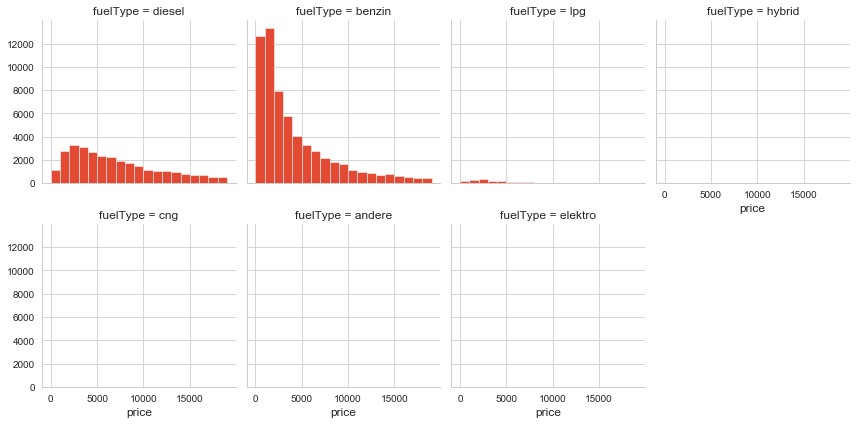

In [43]:
bins = np.arange(0, 20000, 1000)
g = sns.FacetGrid(data = df.sample(100000), col = 'fuelType', col_wrap = 4);
g.map(plt.hist, 'price', bins = bins, edgecolor="w");

fuelType is a very interesting feature. The market is dominated by gasoline (benzin) and diesel drives, alternative drives like hybrid or electro are still a niche product. Diesel drives are more expensive than gasoline and younger cars, but they have the most kilometers.

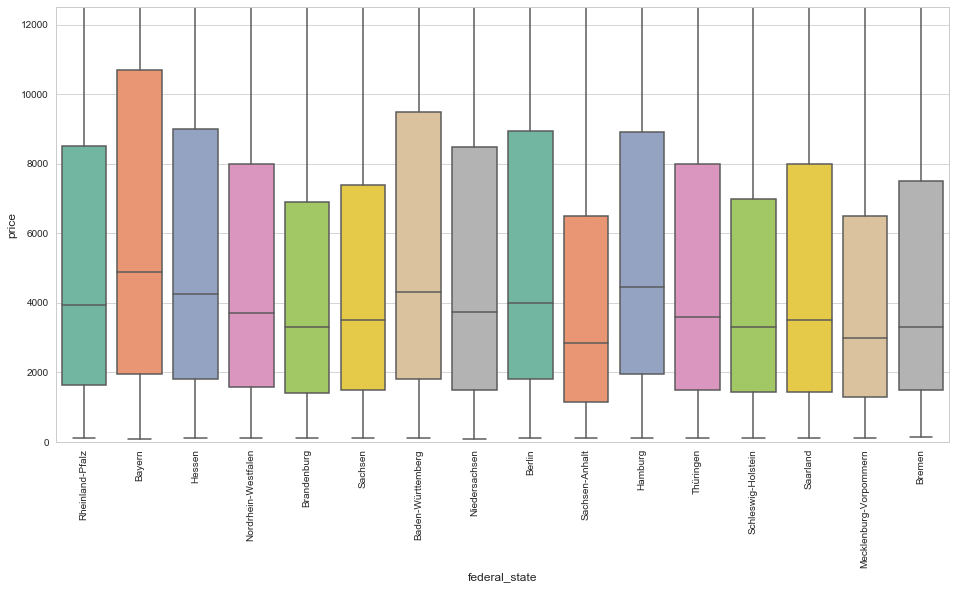

In [44]:
fig, ax = plt.subplots(figsize=(16,8))  
sns.boxplot(data = df, x = 'federal_state', y = 'price', palette = 'Set2')
plt.xticks(rotation = 90);
plt.ylim(0, 12500);

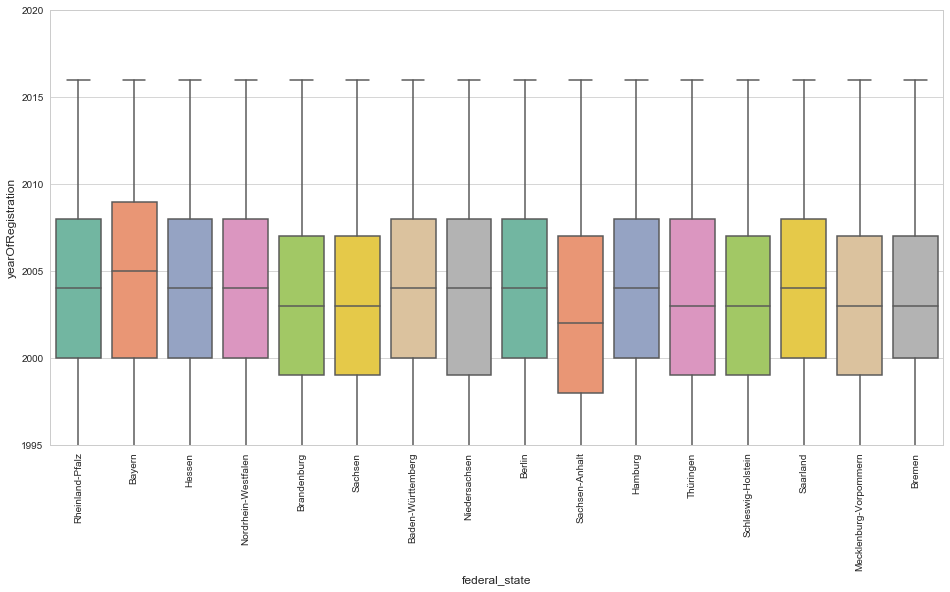

In [45]:
fig, ax = plt.subplots(figsize=(16,8))  
sns.boxplot(data = df, x = 'federal_state', y = 'yearOfRegistration', palette = 'Set2')
plt.xticks(rotation = 90);
plt.ylim(1995, 2020);

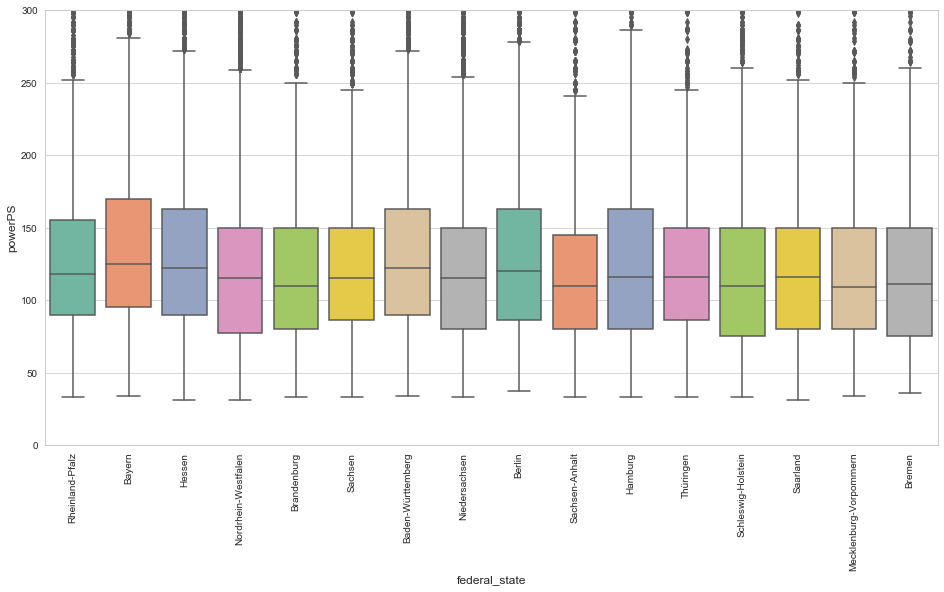

In [46]:
fig, ax = plt.subplots(figsize=(16,8))  
sns.boxplot(data = df, x = 'federal_state', y = 'powerPS', palette = 'Set2')
plt.xticks(rotation = 90);
plt.ylim(0, 300);

The federal state seems to have an impact on the price-niveau. When we have a look at richer federal states like Bayern or Baden-Württemberg we can see that the median price is very high just like the 75% percentil. That's maybe because these states have on average younger vehicles in their offers with more PS.

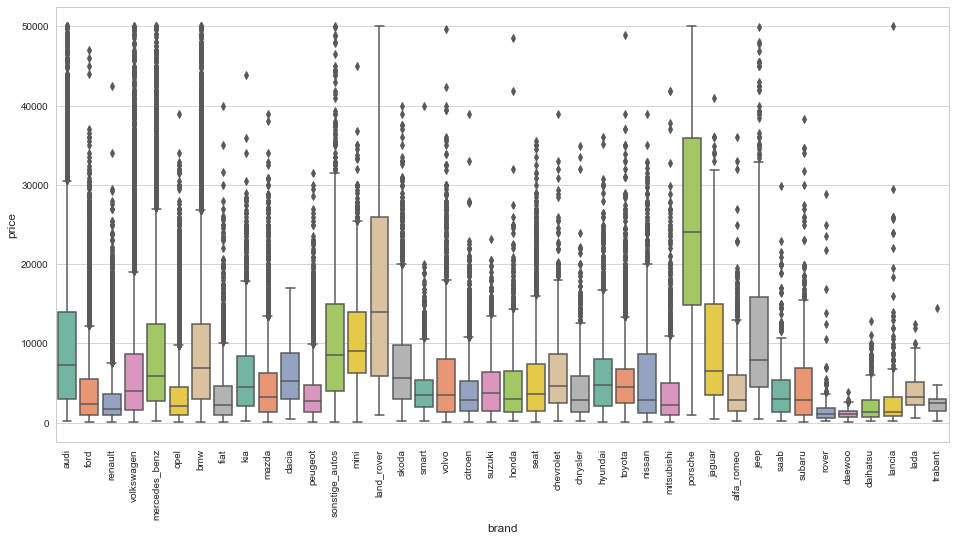

In [47]:
fig, ax = plt.subplots(figsize=(16,8))  
sns.boxplot(data = df, x = 'brand', y = 'price', palette = 'Set2')
plt.xticks(rotation = 90);

There are car brands in very different price segments. This can also be seen very precisely on the box plot. Expensive brands such as Porsche have a much higher average price than a cheaper brand such as Kia

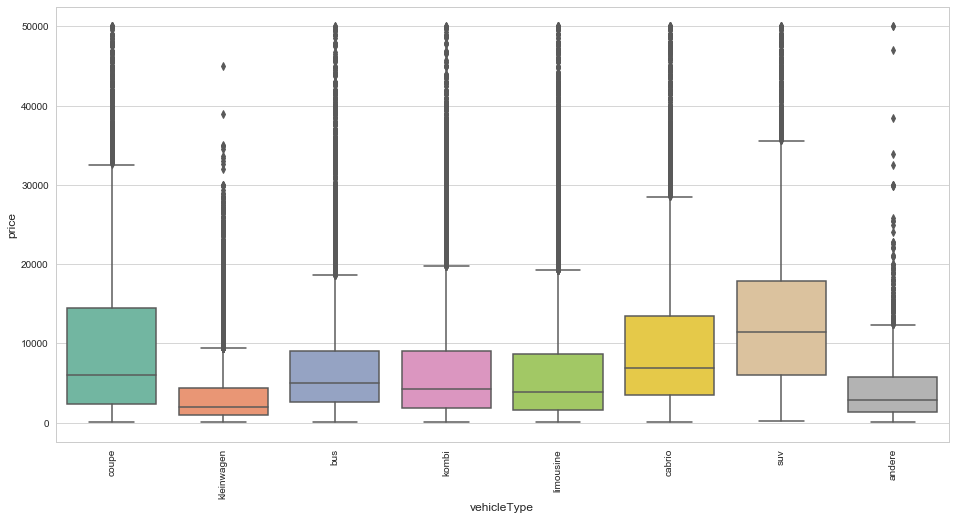

In [48]:
fig, ax = plt.subplots(figsize=(16,8))  
sns.boxplot(data = df, x = 'vehicleType', y = 'price', palette = 'Set2')
plt.xticks(rotation = 90);

Well, I'm not quiete sure if the vehicleType has a big impact on the price, because some feature types are very similar to each other like e.g. the bus,station wagon (kombi) and limousine. But you can clearly see that the small car (Kleinwagen) is cheaper than an SUV or coupe.

## Part IV: Creating the model

In this section it's time to draw conclusions. I will use different machine learning algorithms like LinearRegression, RandomForestRegression and GradientBoostingRegression to predict my target value price. But before I can start with the training I need to finalize my dataset.

### Preparing the data

In [40]:
# one-hot-encode the data
df_fin = pd.get_dummies(df, 
                        columns = ['vehicleType', 'gearbox', 'fuelType', 'brand', 'notRepairedDamage', 'federal_state'])


In [129]:
df_fin.shape

(251555, 79)

In [41]:
# get target
y = df_fin['price']

# get features
X = df_fin.drop('price', axis = 1)

In [42]:
# create trainings and testset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1809)

In [43]:
# normalize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

### Training different algorithms

Now I can start to train different algorithms. The process will be used as follows:

1) Import the regressor          
2) Fit the model using the training set         
3) Make predictions on the test set         
4) Compute the scores         

My aim is to get a R2-Value that is close to one while MSE and MAE should be as low as possible.

#### A) Dummy Regressor

The DummyRegressor is a regressor that makes predictions using simple rules. It can be useful as a simple baseline to compare with other (real) regressors, but it should not be use for real problems. In this case it always predicts the mean of the training set.

In [126]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

dummy_model = DummyRegressor(strategy='mean')
dummy_model.fit(x_train, y_train)

y_pred = dummy_model.predict(x_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R2:', r2)
print('MSE:', mse)
print('MAE:', mae)

R2: -2.7260068988566033e-05
MSE: 65334893.91626444
MAE: 5443.478778820235


This is a very bad result! R2 is extremly low while MSE and MAE are extremly high. I hope we can beat that!

#### B) Linear Regression

LinearRegression fits a linear model with coefficients to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation. You can find more infos [here](https://scikit-learn.org/stable/modules/linear_model.html).

In [45]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R2:', r2)
print('MSE:', mse)
print('MAE:', mae)

R2: 0.6887377050707675
MSE: 20335734.665804494
MAE: 2813.7801267798354


This is much better than the results of the Dummy Regressor. Using linear regression I was able to increase R2 significantly while MSE and MAE fell significantly. But since we don't really have a linear problem here, it might be possible to improve the results!

#### C) Random Forest-Regressor

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default), you can find more information [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor).

In [46]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R2:', r2)
print('MSE:', mse)
print('MAE:', mae)

print(model.get_params())

R2: 0.8918828255945823
MSE: 7063631.56522045
MAE: 1264.5336050916205
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


Using RandomForest-Regression I could again rise R2 to 0.89188 which is a very good value. The MAE fell from 2814 to 1265, which is more than the half and MSE fell from 20.3 Mio to 7.1 Mio. Very good!

### Choosing and Tuning the best model

The best model is the RandomForest-Regressor, because it could achieve the best results on the trainings set. Now it's time to see if I can improve this results by using GridSearchCV.

In [61]:
# import the library
from sklearn.model_selection import GridSearchCV

import time
start = time.time()

# set parameters
params = {'n_estimators': [100, 150],
         'max_depth': [20],
         'min_samples_split': [7, 9, 11]}

# train the model
model = RandomForestRegressor()
grid = GridSearchCV(model, params, n_jobs = -1)
grid_result = grid.fit(x_train, y_train)

# summary
print('Best R2 of', grid_result.best_score_, 'using', grid_result.best_params_)

print(time.time()-start, 'seconds')

Best R2 of 0.8886574644602925 using {'max_depth': 20, 'min_samples_split': 7, 'n_estimators': 100}
1922.1774878501892 seconds


Next I will use the best version to run it on the full trainingsset. Then I'm able to compute the scores for the testset:

In [108]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split=7)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R2:', r2)
print('MSE:', mse)
print('MAE:', mae)

R2: 0.8933606618047154
MSE: 6967079.925210155
MAE: 1288.1865498713344


The **GradientBoosting-Regressor** can also be used to improve the results of a RandomForest-Regressor.

The GradientBoosting-Regressor builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function. You can find more information [here.](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor)

In [97]:
import time
import datetime

start = time.time()
print('Uhrzeit Start:', datetime.datetime.now())

from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=100,
                                 max_depth=20,
                                 min_samples_split=7,
                                 loss='lad')
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R2:', r2)
print('MSE:', mse)
print('MAE:', mae)

print(model.get_params())

print(time.time()-start, 'seconds')

Uhrzeit Start: 2020-01-19 13:39:44.365728
R2: 0.8948394061377334
MSE: 6870468.954704871
MAE: 1219.0860973869117
{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'lad', 'max_depth': 20, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 7, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'presort': 'deprecated', 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
342.3103520870209 seconds


After many testrounds I could improve R2 a little bit using GradientBoostingRegressor. Final $R^2$ is 0.895.

### Feature Engineering
Finally I would like to find out which features of my dataset influence most the price.

In [99]:
#compute the importance of the features
importances = model.feature_importances_

In [100]:
# sort importances
indices = np.argsort(importances)[::-1]

In [101]:
# sort names of the features
names = X.columns[indices]

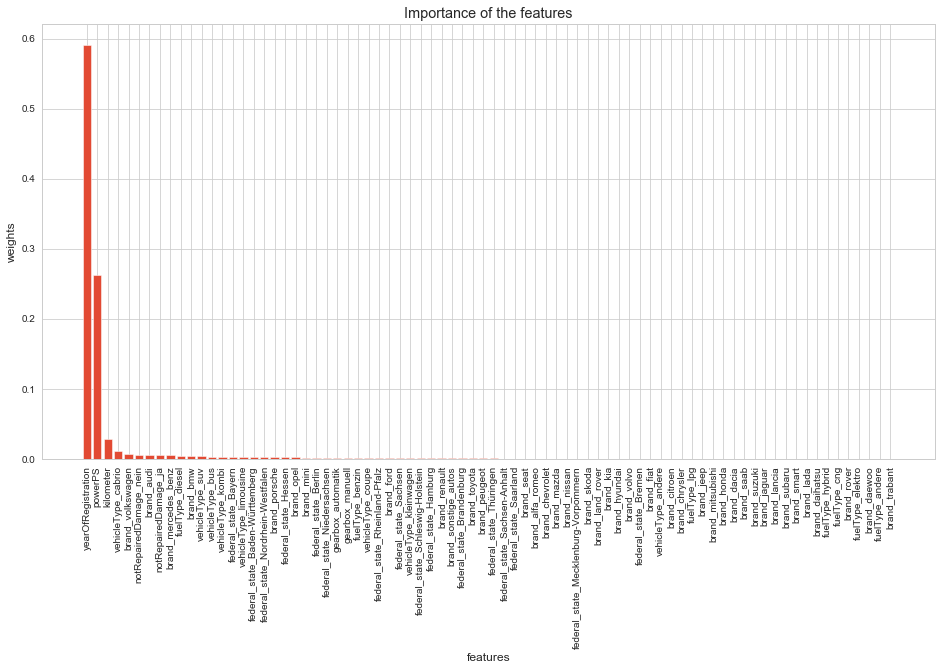

In [109]:
# create bar chart
plt.figure(figsize = (16, 8))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation = 90)
plt.title('Importance of the features')
plt.xlabel('features')
plt.ylabel('weights')
plt.show()

In [130]:
imp_feat = pd.DataFrame(data = importances[indices], index = names)
#imp_feat = imp_feat.rename(columns = {'0' : 'weights'})
print('Top 10 features:', imp_feat.head(20))
print('\n')
print('Flop 10 features:', imp_feat.tail(10))

Top 10 features:                                           0
yearOfRegistration                 0.591259
powerPS                            0.262277
kilometer                          0.028684
vehicleType_cabrio                 0.010814
brand_volkswagen                   0.007854
notRepairedDamage_nein             0.005654
brand_audi                         0.005601
notRepairedDamage_ja               0.005585
brand_mercedes_benz                0.005235
fuelType_diesel                    0.004699
brand_bmw                          0.003871
vehicleType_suv                    0.003663
vehicleType_bus                    0.003482
vehicleType_kombi                  0.002963
federal_state_Bayern               0.002742
vehicleType_limousine              0.002581
federal_state_Baden-Württemberg    0.002528
federal_state_Nordrhein-Westfalen  0.002488
brand_porsche                      0.002434
federal_state_Hessen               0.002248


Flop 10 features:                          0
brand_smart 

## Part V: Discussion and Applicability

This is the part to reflect the analysis - can it be improved and should it be used in real world setting?

Finally, I'm very happy with this analysis. Getting an R2 of 0.895 is a very good result and much better than I dared to hope at the beginning. It gave me great pleasure to analyze the different influencing factors and to integrate them into the model. 

But before I would like to use it in a real world setting I would like to make the analysis again with Data that was collected after 2016 to see if there are changes. I must also note that the model applies to cars that were first registered between 1980 and 2016, have between 30 and 400 PS and had an offer price between 100 and 50000 Euros.